# Step 7 - EDA & Data Exploration

In this step I dive deep in order to understand data distributions, relationships, and patterns.  The results of this step and the previous steps together will determine model selection, validation strategies, feature engineering approaches, preprocessing requirements, and evaluation metrics needed for our fraud detection model.

There are multiple types of analysis that explores the data, including:
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis
* Time-based Analysis

## 7.1 Univariate Analysis
In univariate analysis, I focus on individual features and explore their composition in more depth.

* **Target feature:** In univariate analysis, I explore the distribution shape and class balance for classification problems, range and spread for regression problems, or trends and seasonality for time series. Depending on the data, outliers and extreme targets are also checked, and transformation requirements are assessed. For this project, while we established the imbalance in Step 5, I'll create visual representations and quantify the exact imbalance ratio for model selection decisions.

* **Time feature:** The Time feature can be explored for its range and spread, outliers, extreme values, and possible trends. I'll use histograms, box plots, and summary statistics to visualize these patterns.

* **Amount feature:** The Amount feature is a great target for transformation due to the wide ranges that transactions naturally take. I'll also check its distribution and examine outliers and extreme values. I'll use histograms, box plots, and summary statistics to visualize these patterns.

* **PCA features:** For these features, there's no need to perform any analysis, and no meaningful information can be gained in univariate analysis because PCA components are already transformed, standardized, and designed to be uncorrelated. Individual PCA components lack direct business interpretation, so univariate analysis of V1, V2, etc. doesn't provide actionable insights. The real value comes from examining how these components relate to fraud detection in bivariate analysis.

The insights from this univariate analysis will inform preprocessing decisions and feature engineering in later steps.

Target feature visual representation


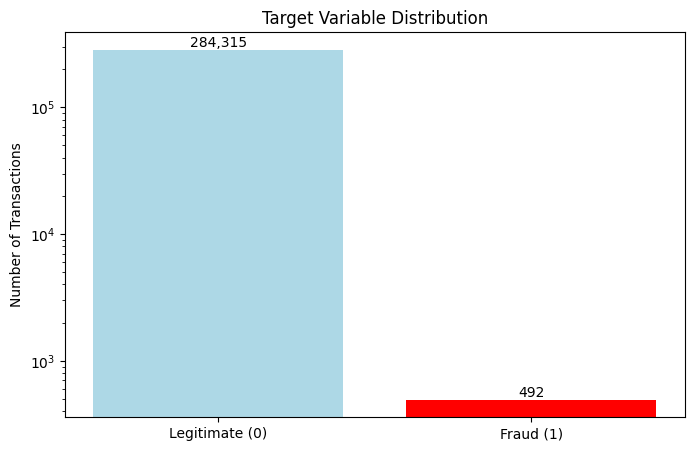

Class Distribution:
	Legitimate transactions: 284,315 (99.827%)
	Fraud transactions: 492 (0.173%)
	Imbalance ratio: 1:578 (fraud:legitimate)
Time feature visualization


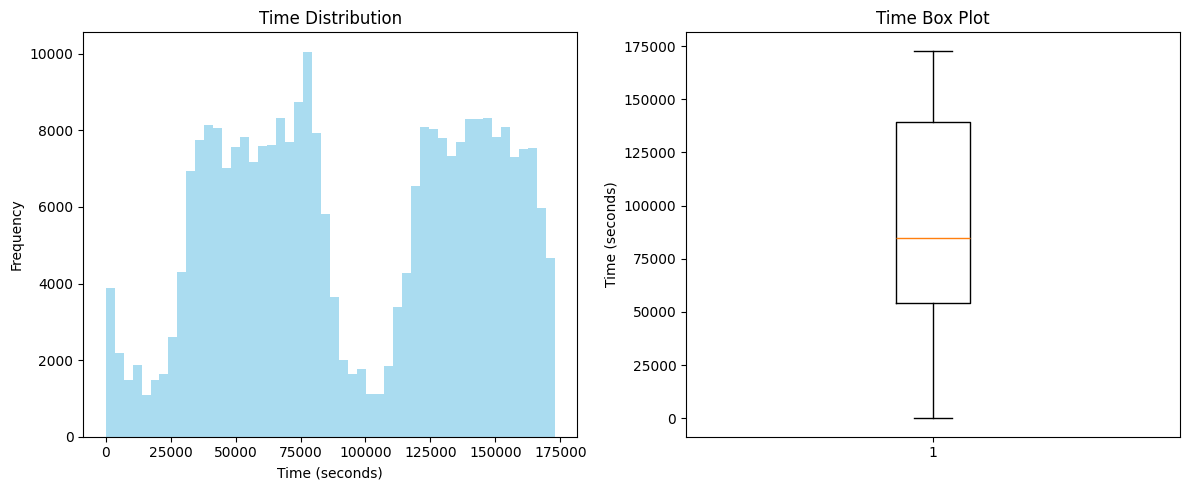

Time Feature Summary:
  Count: 284,807
  Mean: 94,813.86 seconds
  Median: 84,692.00 seconds
  Std Dev: 47,488.15 seconds
  Min: 0.00 seconds
  Max: 172,792.00 seconds
  Range: 172,792.00 seconds
Amount Feature Visualization


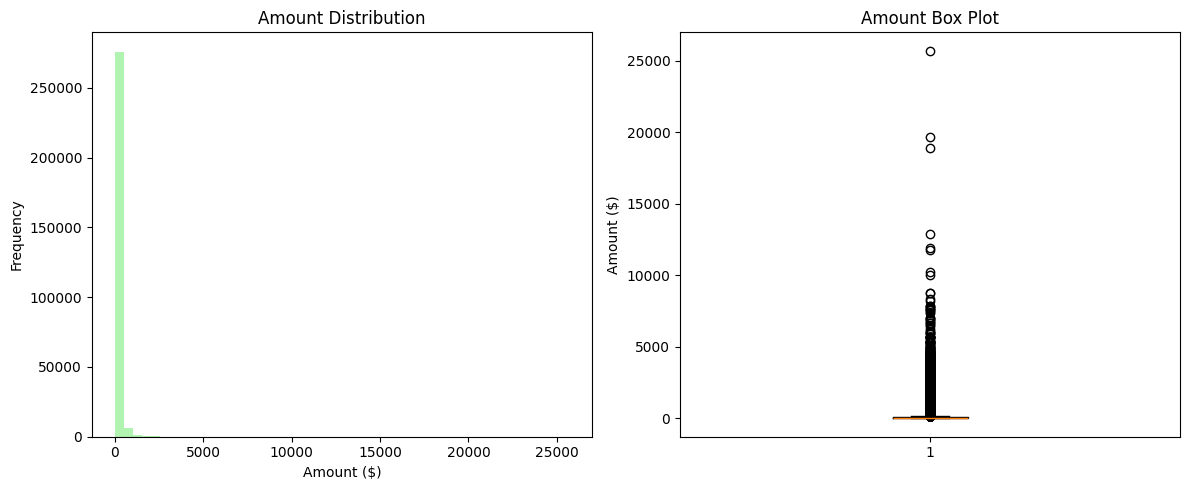

Amount Feature Summary:
  Count: 284,807
  Mean: $88.35
  Median: $22.00
  Std Dev: $250.12
  Min: $0.00
  Max: $25,691.16
  Range: $25,691.16
  Zero amount transactions: 1,825 (0.64%)


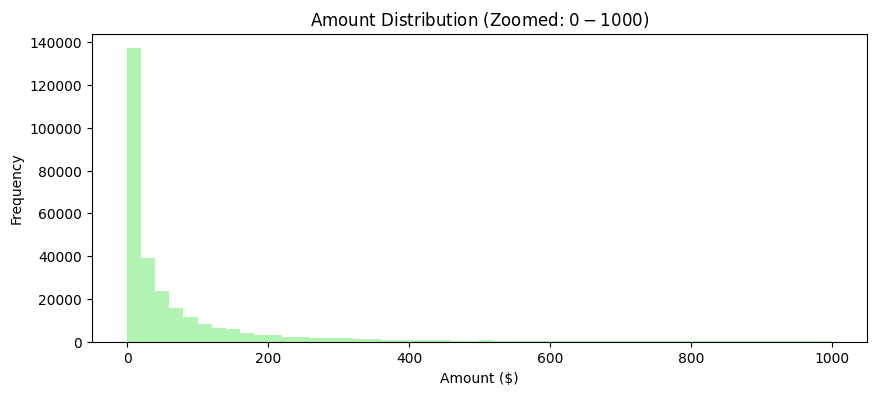

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

data_path = Path("../data/creditcard.csv")
df = pd.read_csv(data_path)

# 1. Target feature visualization
print("Target feature visual representation")

fraud_count = df['Class'].sum()
legit_count = len(df) - fraud_count
total_count = len(df)

# 1.1 Bar Chart
plt.figure(figsize=(8,5))
classes = ['Legitimate (0)', 'Fraud (1)']
counts = [legit_count, fraud_count]
colors = ['lightblue', 'red']

plt.bar(classes, counts, color=colors)
plt.title('Target Variable Distribution')
plt.ylabel('Number of Transactions')
plt.yscale('log')
for i, count in enumerate(counts):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')
plt.show()

# 1.2 class balance statistics
fraud_percentage = (fraud_count / total_count) * 100
imbalance_ratio = legit_count / fraud_count

print(f"Class Distribution:")
print(f"\tLegitimate transactions: {legit_count:,} ({100-fraud_percentage:.3f}%)")
print(f"\tFraud transactions: {fraud_count:,} ({fraud_percentage:.3f}%)")
print(f"\tImbalance ratio: 1:{imbalance_ratio:.0f} (fraud:legitimate)")

print("="*50)

# Time feature visualization
print("Time feature visualization")

# Subplot creation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.hist(df['Time'], bins=50, color='skyblue', alpha=0.7)
ax1.set_title('Time Distribution')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Frequency')

#box plot
ax2.boxplot(df['Time'])
ax2.set_title('Time Box Plot')
ax2.set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

# summary statistics
print("Time Feature Summary:")
print(f"  Count: {df['Time'].count():,}")
print(f"  Mean: {df['Time'].mean():,.2f} seconds")
print(f"  Median: {df['Time'].median():,.2f} seconds")
print(f"  Std Dev: {df['Time'].std():,.2f} seconds")
print(f"  Min: {df['Time'].min():,.2f} seconds")
print(f"  Max: {df['Time'].max():,.2f} seconds")
print(f"  Range: {df['Time'].max() - df['Time'].min():,.2f} seconds")

print("="*50)

print("Amount Feature Visualization")

# Subplot creation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.hist(df['Amount'], bins=50, color='lightgreen', alpha=0.7)
ax1.set_title('Amount Distribution')
ax1.set_xlabel('Amount ($)')
ax1.set_ylabel('Frequency')

# Box plot
ax2.boxplot(df['Amount'])
ax2.set_title('Amount Box Plot')
ax2.set_ylabel('Amount ($)')

plt.tight_layout()
plt.show()

# Amount summary statistics
print("Amount Feature Summary:")
print(f"  Count: {df['Amount'].count():,}")
print(f"  Mean: ${df['Amount'].mean():,.2f}")
print(f"  Median: ${df['Amount'].median():,.2f}")
print(f"  Std Dev: ${df['Amount'].std():,.2f}")
print(f"  Min: ${df['Amount'].min():,.2f}")
print(f"  Max: ${df['Amount'].max():,.2f}")
print(f"  Range: ${df['Amount'].max() - df['Amount'].min():,.2f}")

# Check zero amount transactions
zero_amount_count = (df['Amount'] == 0).sum()
zero_percentage = (zero_amount_count / len(df)) * 100
print(f"  Zero amount transactions: {zero_amount_count:,} ({zero_percentage:.2f}%)")

# Zoomed in amount
plt.figure(figsize=(10, 4))
plt.hist(df[df['Amount'] <= 1000]['Amount'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Amount Distribution (Zoomed: $0-$1000)')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()

### 7.1 Results

**Target Variable:** Since we've known from the beginning that the dataset will have a large imbalance there is no shock here but it's good to visualize the disparity. ()
* With the 1:587 ratio of fraud:legitimat, sampling strategies like SMOTE or class weighting are necessary. I will use class weight balancing first and in case  recall is poor I will try SMOTE. Using SMOTE runs the risk of creating synthetic data that might not be realistic.

**Time Features:** We can see two distinct peaks with a gap in between in the time graph. Thus the feature follows a binomial distribution. There could be multiple reasons behind it and thus we have to investigate further in the bivariate analysis.
* It is likely that data is collected in two separate periods or in different operational periods and different fraud patterns happen during each peak.

**Amount Feature:** The data is heavily right-skewed with most transactions are small amounts with a median of $22 and a mean of $88. We can observe an extensive amount of outliers.
* Thus the amount feature is a strong candidate for log transformation before modeling and after tran/test split. Linear models work better with normal distributions not to mention we'll reduce the impact of outliers.

Also, the zero-amount transaction are normal as already established before.

## 7.2 Bivariate Analysis

Bivariate analysis is the next step. For any project, bivariate analysis is core. However, not all analysis steps apply to all projects. For fraud detection:

* Visualization of feature vs. target reveals core insight in their relationship and is crucial in fraud detection.
* How do fraud vs. legitimate transaction differ for Time or Amount? That's where conditional distribution by target comes in.
* We can't forget basic correlation coefficient display. We'll see correlation of time/amount vs class.

We need to know fraud rate during different peaks. We need to know the pattern of fraud by transaction amount. And we need to the distribution of amount for fraud vs. legitimate transaction.

However, we will not need to do some common bivariate analysis in this project:

* Chi-sqaure is a common and popular test that tests if two categorical variables are independent but does not work since we don't have categorical data.
* correlation matrices/heatmaps will not work because PCA features are designed to be uncorrelated.
* Scatter plot of the feature would be unreadable
* cross-tabulation which counts how often categorical combinations occur does not work since we don't have categorical data.
* PCA also solves the multicollinearity problem which finds redundant features.
* And PCA already does grouping and thus feature clustering is not necessary.

7.2 Bivariate Analysis
A) Basic Correlation with Target (Class):
Time vs Class correlation: -0.0123
Amount vs Class correlation: 0.0056
B) Time vs Class Relationship
Early period (0-90k seconds): 148,518 transactions
  Fraud rate: 0.192%
Late period (90k+ seconds): 136,289 transactions
  Fraud rate: 0.152%


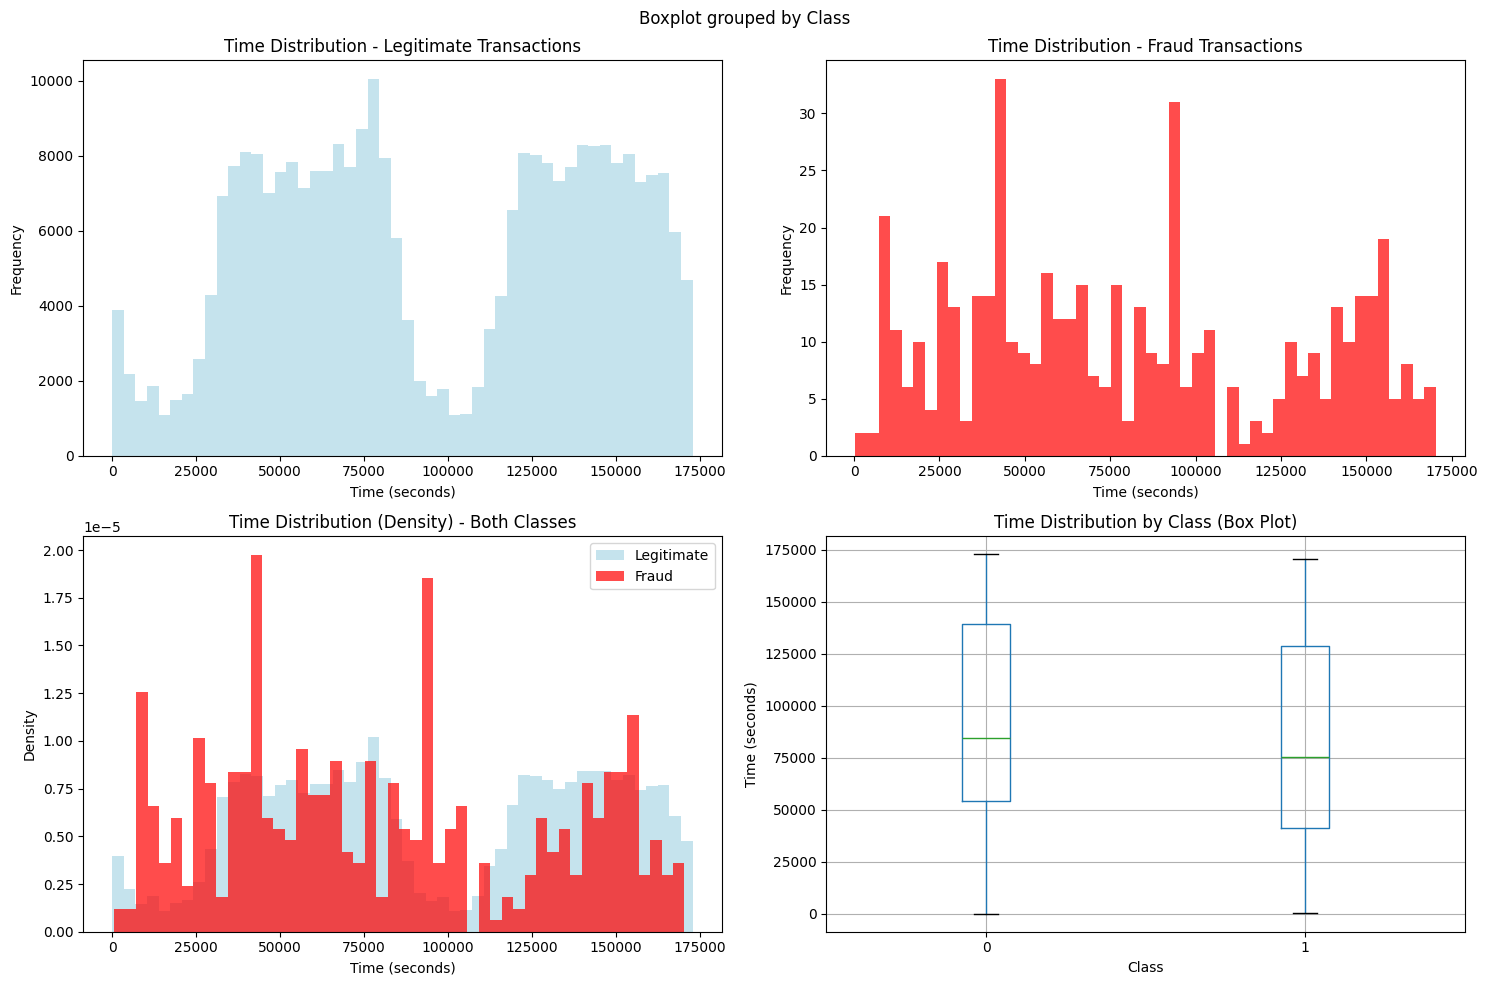

C) Amount vs Class Relationship
Fraud rate by amount ranges:
  $0-50: 0.161% (305/189704 transactions)
  $50-100: 0.151% (57/37718 transactions)
  $100-500: 0.198% (95/47893 transactions)
  $500-1000: 0.405% (26/6423 transactions)
  $1000+: 0.293% (9/3069 transactions)


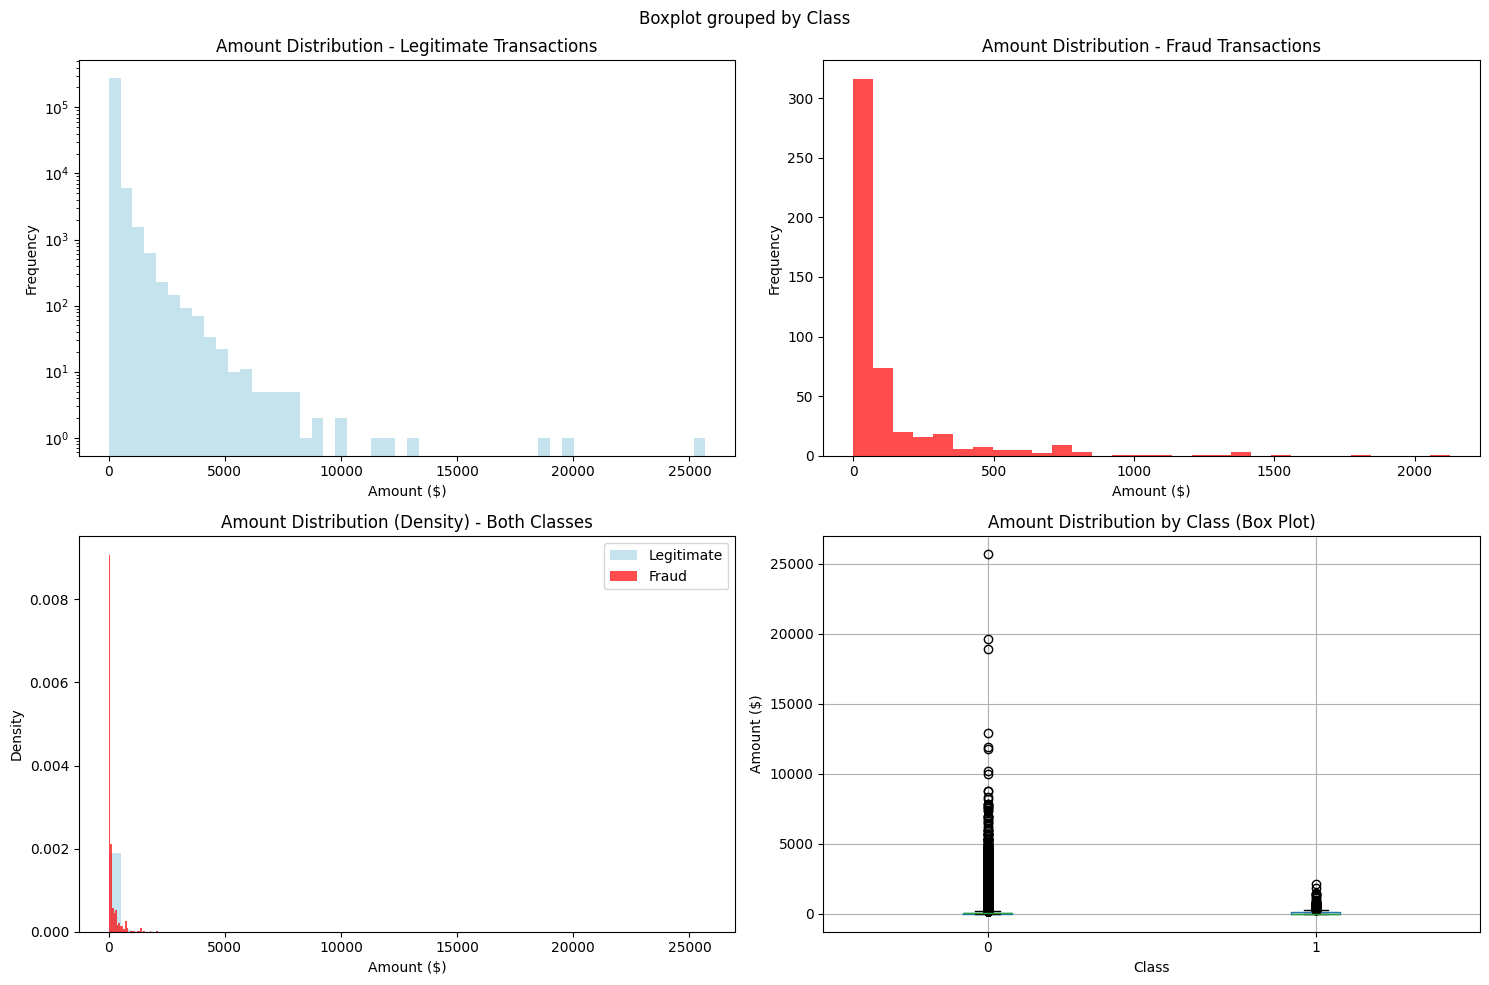

D) Amount summary by class:
Legitimate transactions:
  Mean: $88.29
  Median: $22.00
  Max: $25691.16
Fraud transactions:
  Mean: $122.21
  Median: $9.25
  Max: $2125.87


In [34]:
print("7.2 Bivariate Analysis")
print("="*50)

# Basic correlation coefficients
print("A) Basic Correlation with Target (Class):")
correlations = df[['Time', 'Amount', 'Class']].corr()
correlations = correlations['Class'].sort_values(ascending=False)
print(f"Time vs Class correlation: {correlations['Time']:.4f}")
print(f"Amount vs Class correlation: {correlations['Amount']:.4f}")

print("="*20)

# Time vs Class Relationship
print("B) Time vs Class Relationship")
# Define time periods based on the bimodal distribution
early_period = df[df['Time'] <= 90000]  # First peak
late_period = df[df['Time'] > 90000]   # Second peak

# Calculate fraud rates for each period
early_fraud_rate = early_period['Class'].mean() * 100
late_fraud_rate = late_period['Class'].mean() * 100

print(f"Early period (0-90k seconds): {len(early_period):,} transactions")
print(f"  Fraud rate: {early_fraud_rate:.3f}%")
print(f"Late period (90k+ seconds): {len(late_period):,} transactions")
print(f"  Fraud rate: {late_fraud_rate:.3f}%")

# Visualize fraud rate over time
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

legitimate = df[df['Class'] == 0]['Time']
fraud = df[df['Class'] == 1]['Time']

ax1.hist(legitimate, bins=50, color='lightblue', alpha=0.7)
ax1.set_title('Time Distribution - Legitimate Transactions')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Frequency')

ax2.hist(fraud, bins=50, color='red', alpha=0.7)
ax2.set_title('Time Distribution - Fraud Transactions')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Frequency')

# Density plots for comparison
ax3.hist(legitimate, bins=50, density=True, alpha=0.7, label='Legitimate', color='lightblue')
ax3.hist(fraud, bins=50, density=True, alpha=0.7, label='Fraud', color='red')
ax3.set_title('Time Distribution (Density) - Both Classes')
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Density')
ax3.legend()

# Box plot
df.boxplot(column='Time', by='Class', ax=ax4)
ax4.set_title('Time Distribution by Class (Box Plot)')
ax4.set_xlabel('Class')
ax4.set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

print("="*20)

# Amount vs Class Relationship
print("C) Amount vs Class Relationship")

# Fraud patterns by amount ranges
amount_ranges = [0, 50, 100, 500, 1000, float('inf')]
range_labels = ['$0-50', '$50-100', '$100-500', '$500-1000', '$1000+']

print("Fraud rate by amount ranges:")
for i, label in enumerate(range_labels):
    mask = (df['Amount'] >= amount_ranges[i]) & (df['Amount'] < amount_ranges[i+1])
    subset = df[mask]
    fraud_rate = subset['Class'].mean() * 100
    print(f"  {label}: {fraud_rate:.3f}% ({subset['Class'].sum()}/{len(subset)} transactions)")

# Visualize amount distribution by class
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

legitimate_amount = df[df['Class'] == 0]['Amount']
fraud_amount = df[df['Class'] == 1]['Amount']

# Separate histograms with log scale
ax1.hist(legitimate_amount, bins=50, color='lightblue', alpha=0.7)
ax1.set_title('Amount Distribution - Legitimate Transactions')
ax1.set_xlabel('Amount ($)')
ax1.set_ylabel('Frequency')
ax1.set_yscale('log')

ax2.hist(fraud_amount, bins=30, color='red', alpha=0.7)  # Fewer bins for fraud
ax2.set_title('Amount Distribution - Fraud Transactions')
ax2.set_xlabel('Amount ($)')
ax2.set_ylabel('Frequency')

# Density plots for comparison
ax3.hist(legitimate_amount, bins=50, density=True, alpha=0.7, label='Legitimate', color='lightblue')
ax3.hist(fraud_amount, bins=30, density=True, alpha=0.7, label='Fraud', color='red')
ax3.set_title('Amount Distribution (Density) - Both Classes')
ax3.set_xlabel('Amount ($)')
ax3.set_ylabel('Density')
ax3.legend()

# Box plot
df.boxplot(column='Amount', by='Class', ax=ax4)
ax4.set_title('Amount Distribution by Class (Box Plot)')
ax4.set_xlabel('Class')
ax4.set_ylabel('Amount ($)')

plt.tight_layout()
plt.show()

print("="*20)

# Amount summary by class statistics
print("D) Amount summary by class:")
print("Legitimate transactions:")
print(f"  Mean: ${legitimate_amount.mean():.2f}")
print(f"  Median: ${legitimate_amount.median():.2f}")
print(f"  Max: ${legitimate_amount.max():.2f}")

print("Fraud transactions:")
print(f"  Mean: ${fraud_amount.mean():.2f}")
print(f"  Median: ${fraud_amount.median():.2f}")
print(f"  Max: ${fraud_amount.max():.2f}")

#### 7.2 Results

**1) Correlation Analysis**

The results show very weak correlations (-0.0123 for Time, 0.0056 for Amount). Fraud patterns are rarely linear. This does not mean these features are not valuable in non-linear models.

**2) Time vs Class Patterns**

There is a slight fraud rate difference between the two peaks (0.192% vs 0.152%). Thus, fraud follows the same bimodal pattern as legitimate transactions. Time is still a useful feature.

**3) Amount vs Class**

Here we can clearly see a number of patterns:

1. The 500-1000 range is the fraudsters' range of choice: 0.405% (26/6423 transactions)
2. Fraudsters avoid high amounts (max fraud: 2,125 vs max legitimate: 25,691)


| Amount Range | Fraud Rate | Interpretation |
|--------------|------------|----------------|
| 0-50       | 0.161%     | Baseline fraud rate |
| 50-100     | 0.151%     | Similar to baseline |
| 100-500    | 0.198%     | Slightly higher |
| 500-1000   | 0.405%     | 2.5x higher than baseline! |
| 1000+      | 0.293%     | High but lower than \$500-1000 |

#### Conclusion

In this dataset, I can see that Amount is the strongest predictor feature so far. This fact warrants considering adding categorical buckets for Amount in feature engineering.

Also, we now know that due to fraud amounts being heavily skewed toward smaller values, we need log transformation.

The model selection is being narrowed down. So far, tree-based models like XGBoost and Random Forest are strong contenders.

## Final Conclusions

The EDA has now shown me all that I needed to see and there are no other analysis steps that apply to this project and this dataset. EDA has shown us:

* Amount is the strongest predictor feature and feature engineering is possibly beneficial.
* Fraud amounts are skewed towards smaller values and the range of values is large, thus data proceprocessing especially log transformation is needed.
* For the class imbalance, class weights will be our go to remedy.

### Side Note

Some projects need more than just univariate and bivariate analysis but not this project. Other EDA analysis could include:

* Multivariate analysis
    * If our data was not in PCA format, a PCA exploration would show each component's variance.
    * Other PCA related tasks for finding the optimal PCA components and seeing which PCA components have the most information were done by the dataset creators and we don't need to bother ourselves with them.
    * t-SNE and UMAP are done to visualize the dimensions in a 2D space but with our dataset of 284 points and 492 fraud cases the computation is too expensive and will show us no discernable patterns
    * Feature importance can also be done using simple modeling but the scope of this project and the problem we're trying to fix does not warrant that.
    * We know PCA transformation solves the curse of dimentionality so we can cross that as well.
    * Clustering is a good EDA. But not with a dataset with so much class imbalance.
    * Sometimes anomaly detection can help us find weird points in the data but unless a special case is being considered, usually the model itself will find the anomolies and there is no need for it right now.
* Time-Based Analysis
    * We don't need to do trend analysis because fraud rates don't increase and decrease over time and we've seen that in the distribution histogram of time.
    * The Time feature we have is not a calendar time and thus seasonality cannot be decduced from it.
    * Fraud does not predict future fraud and thus there is no need to check for autocorrelation.
    * The bimodal distribution of Time also rules out cyclical patterns.
    * Also, the bimodal pattern shows the main time structure and thus we don't